# Description 
The code was developed to assess climate variability in Benue Basin, Nigeria 

In [2]:
# Install jupyter lab + git extension in not installed
#conda install -c conda-forge jupyterlab jupyterlab-git

# Install packages
"""
conda install -c conda-forge geopandas
conda install -c conda-forge matplotlib
conda install -c conda-forge geojson
conda install -c conda-forge folium
"""
# ... install other packages



'\nconda install -c conda-forge geopandas\nconda install -c conda-forge matplotlib\nconda install -c conda-forge geojson\nconda install -c conda-forge folium\n'

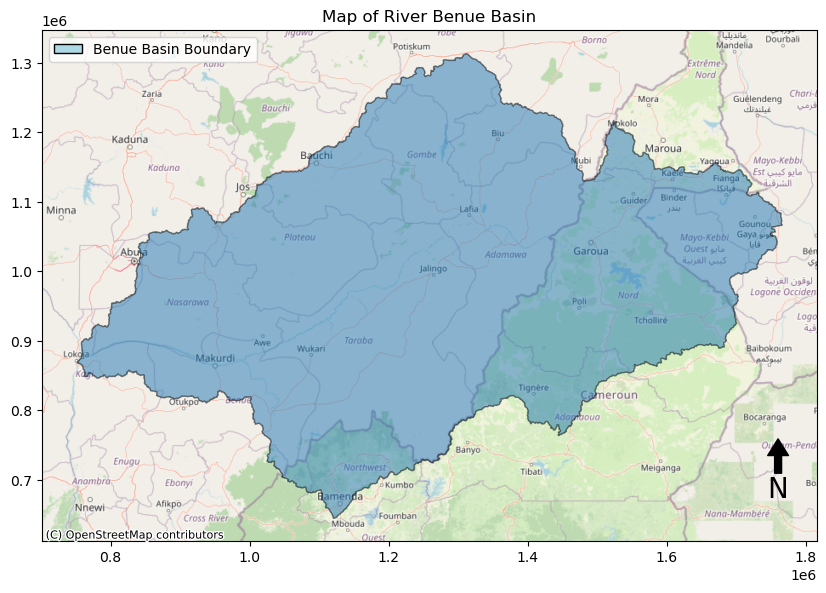

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.patches import Patch

# Load the shapefile
aoi = gpd.read_file('BasinBoundaryWGS84/Boundary.shp')

# Project the data to Web Mercator (EPSG:3857)
aoi = aoi.to_crs(epsg=3857)

# Plot the AOI with OpenStreetMap background
fig, ax = plt.subplots(figsize=(10, 10))
aoi.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Add legend
legend_elements = [Patch(facecolor='lightblue', edgecolor='k', label='Benue Basin Boundary')]
ax.legend(handles=legend_elements, loc='upper left')

# Add north arrow
x, y, arrow_length = 0.95, 0.2, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20, xycoords=ax.transAxes)

plt.title('Map of River Benue Basin')
plt.show()

In [2]:
import requests


parameters = [
    'CLRSKY_SFC_SW_DWN',
    'ALLSKY_SFC_SW_DWN',
    'ALLSKY_KT',
    'WS2M',
    'WS10M',
    'WS50M',
    'T2M',
    'T10M',
    'TS',
    'QV2M',
    'RH2M',
    'PRECTOTCORR',
    'PS',
    'WD2M',
    'WD10M',
    'WD50M',
    'ALLSKY_SFC_UV_INDEX',
    'ALLSKY_SRF_ALB',
    'ALLSKY_SFC_SW_UP',
    'ALLSKY_SFC_SW_DNI',
    'ALLSKY_SFC_SW_DIFF',
    'ALLSKY_SFC_LW_DWN',
    'ALLSKY_SFC_LW_UP',
    'CLOUD_AMT_DAY',
    'DIRECT_ILLUMINANCE',
    'GLOBAL_ILLUMINANCE',
    'DIFFUSE_ILLUMINANCE',
    'ALLSKY_SFC_PAR_TOT',
    'ALLSKY_SFC_UVA',
    'ALLSKY_SFC_UVB',
    'CLRSKY_SRF_ALB',
    'CLRSKY_SFC_LW_DWN',
    'CLRSKY_SFC_LW_UP',
    'CLRSKY_SFC_PAR_TOT',
    'CLRSKY_SFC_SW_DIFF',
    'CLRSKY_SFC_SW_DNI',
    'CLRSKY_SFC_SW_UP',
    'CLOUD_OD',
    'U2M',
    'U10M',
    'U50M',
    'MIDDAY_INSOL',
    'V2M',
    'V10M',
    'V50M',
    'PBLTOP',
    'PW',
    'SLP',
    'RHOA',
    'ZENITH_LUMINANCE'
]

In [3]:
parameters_subset = ','.join(parameters[:20])
url = f'https://power.larc.nasa.gov/api/temporal/daily/point?start=20140101&end=20240101&latitude=7.8147&longitude=8.4962&community=SB&parameters={parameters_subset}&format=CSV'

response = requests.get(url)

In [4]:
data = response.text
print(data)

-BEGIN HEADER-
NASA/POWER CERES/MERRA2 Native Resolution Daily Data 
Dates (month/day/year): 01/01/2014 through 01/01/2024 
Location: Latitude  7.8147   Longitude 8.4962 
Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 147.19 meters
The value for missing source data that cannot be computed or is outside of the sources availability range: -999 
Parameter(s): 
CLRSKY_SFC_SW_DWN       CERES SYN1deg Clear Sky Surface Shortwave Downward Irradiance (W/m^2) 
ALLSKY_SFC_SW_DWN       CERES SYN1deg All Sky Surface Shortwave Downward Irradiance (W/m^2) 
ALLSKY_KT               CERES SYN1deg All Sky Insolation Clearness Index (dimensionless) 
WS2M                    MERRA-2 Wind Speed at 2 Meters (m/s) 
WS10M                   MERRA-2 Wind Speed at 10 Meters (m/s) 
WS50M                   MERRA-2 Wind Speed at 50 Meters (m/s) 
T2M                     MERRA-2 Temperature at 2 Meters (C) 
T10M                    MERRA-2 Temperature at 10 Meters (C) 
TS                      ME

In [5]:
data_parts = data.split('-END HEADER-')
explanation = data_parts[0]

print(explanation)

-BEGIN HEADER-
NASA/POWER CERES/MERRA2 Native Resolution Daily Data 
Dates (month/day/year): 01/01/2014 through 01/01/2024 
Location: Latitude  7.8147   Longitude 8.4962 
Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 147.19 meters
The value for missing source data that cannot be computed or is outside of the sources availability range: -999 
Parameter(s): 
CLRSKY_SFC_SW_DWN       CERES SYN1deg Clear Sky Surface Shortwave Downward Irradiance (W/m^2) 
ALLSKY_SFC_SW_DWN       CERES SYN1deg All Sky Surface Shortwave Downward Irradiance (W/m^2) 
ALLSKY_KT               CERES SYN1deg All Sky Insolation Clearness Index (dimensionless) 
WS2M                    MERRA-2 Wind Speed at 2 Meters (m/s) 
WS10M                   MERRA-2 Wind Speed at 10 Meters (m/s) 
WS50M                   MERRA-2 Wind Speed at 50 Meters (m/s) 
T2M                     MERRA-2 Temperature at 2 Meters (C) 
T10M                    MERRA-2 Temperature at 10 Meters (C) 
TS                      ME

In [6]:
with open('subset_data_explanation.txt', 'w') as file:
    file.write(explanation)

In [7]:
actual_data = data_parts[1].strip()
print(actual_data)

YEAR,MO,DY,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,ALLSKY_KT,WS2M,WS10M,WS50M,T2M,T10M,TS,QV2M,RH2M,PRECTOTCORR,PS,WD2M,WD10M,WD50M,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_UP,ALLSKY_SFC_SW_DNI
2014,1,1,237.53,218.84,0.59,1.4,2.12,3.34,26.89,26.87,28.51,11.72,55.75,0.0,99.37,157.5,157.69,156.81,1.63,0.12,25.61,152.87
2014,1,2,241.87,208.66,0.55,2.45,3.65,5.18,27.53,27.97,28.02,6.29,30.94,0.0,99.31,78.56,78.62,77.62,1.59,0.12,24.47,161.53
2014,1,3,256.05,237.59,0.63,3.06,4.66,6.81,26.89,27.57,27.14,4.52,23.0,0.0,99.32,68.25,68.19,67.25,1.87,0.14,33.34,175.05
2014,1,4,250.62,240.77,0.64,3.11,4.73,7.05,26.1,26.7,26.43,4.46,23.5,0.0,99.39,79.56,79.5,78.38,1.77,0.12,29.11,212.22
2014,1,5,252.93,253.42,0.67,2.34,3.52,4.77,25.98,26.75,26.26,5.55,29.25,0.0,99.38,118.06,118.0,117.06,1.83,0.13,32.37,273.36
2014,1,6,245.06,241.98,0.64,2.99,4.39,6.38,26.1,26.63,26.15,5.25,27.75,0.0,99.38,97.0,96.94,96.25,1.72,0.11,27.67,227.6
2014,1,7,259.06,259.7,0.69,3.09,4.65,6.93,26.28,26.81,26.72,4.58,23.

In [8]:
with open('subset_data.csv', 'w') as f:
    f.write(actual_data)

In [9]:
import pandas as pd

df = pd.read_csv('subset_data.csv')
df.head()

,YEAR,MO,DY,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,ALLSKY_KT,WS2M,WS10M,WS50M,T2M,...,RH2M,PRECTOTCORR,PS,WD2M,WD10M,WD50M,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_UP,ALLSKY_SFC_SW_DNI
0,2014,1,1,237.53,218.84,0.59,1.40,2.12,3.34,26.89,...,55.75,0.0,99.37,157.50,157.69,156.81,1.63,0.12,25.61,152.87
1,2014,1,2,241.87,208.66,0.55,2.45,3.65,5.18,27.53,...,30.94,0.0,99.31,78.56,78.62,77.62,1.59,0.12,24.47,161.53
2,2014,1,3,256.05,237.59,0.63,3.06,4.66,6.81,26.89,...,23.00,0.0,99.32,68.25,68.19,67.25,1.87,0.14,33.34,175.05
3,2014,1,4,250.62,240.77,0.64,3.11,4.73,7.05,26.10,...,23.50,0.0,99.39,79.56,79.50,78.38,1.77,0.12,29.11,212.22
4,2014,1,5,252.93,253.42,0.67,2.34,3.52,4.77,25.98,...,29.25,0.0,99.38,118.06,118.00,117.06,1.83,0.13,32.37,273.36


In [11]:
df.replace(-999, pd.NA, inplace=True)

In [12]:
df.isna().sum()

YEAR                    0
MO                      0
DY                      0
CLRSKY_SFC_SW_DWN       0
ALLSKY_SFC_SW_DWN       0
ALLSKY_KT               0
WS2M                    0
WS10M                   0
WS50M                   0
T2M                     0
T10M                    0
TS                      0
QV2M                    0
RH2M                    0
PRECTOTCORR             0
PS                      0
WD2M                    0
WD10M                   0
WD50M                   0
ALLSKY_SFC_UV_INDEX    17
ALLSKY_SRF_ALB          0
ALLSKY_SFC_SW_UP        0
ALLSKY_SFC_SW_DNI       0
dtype: int64